In [113]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#Reading data
data = pd.read_csv('data/heart.csv', index_col=0)
# X-->inputs Y-->outputs
X = np.array(data[['trestbps','chol','thalach','oldpeak']])
y = np.array(data['target'])
y = y.reshape(y.shape[0],1)
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

In [114]:
def sigmoid(z):
    return ( 1.0 / (1.0 + np.e**(-z)) )

#test
z = 0
g = sigmoid(z)
print('g(', z, ') = ', g)

g( 0 ) =  0.5


In [117]:
def costFunction(theta, X, y):
    # Initialize some useful values
    m = y.size
    J = ( np.sum( -y*np.log(sigmoid(np.dot(X,theta))) - (1-y)*np.log(1-sigmoid(np.dot(X,theta))) ) / m )
    return J

In [118]:
# Initialize fitting parameters
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
print("Cost = ", cost)

Cost =  210.02359570966343


In [143]:
#Gradiant Descent
iterations = 500
alpha = 0.05
def Gradiantdescent(X, initial_theta):
    m = y.size
    theta = initial_theta
    jvec = [] #all gradiant
    for _ in range(iterations):
        tmptheta = theta
        for j in range(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m) * np.sum( (sigmoid(np.dot(X, theta)) - y)*np.array(X[:,j]).reshape(m,1) )
            jvec.append((1/m) * np.sum( (sigmoid(np.dot(X, theta)) - y)*np.array(X[:,j]).reshape(m,1) ))
        tmptheta[0] =  theta[j] - (alpha/m) * np.sum( (sigmoid(np.dot(X, theta)) - y) )
        jvec[0] = (1/m) * np.sum( (sigmoid(np.dot(X, theta)) - y)) 
        theta = tmptheta
    return theta, jvec

In [140]:
def predict(theta, X):
    m = X.shape[0] # Number of training examples
    p = np.zeros(m)
    p = np.where(sigmoid(np.dot(X, theta))>0.5,1,0)
    return p


In [144]:
initial_theta = np.zeros(X.shape[1])
theta, jvec = Gradiantdescent(X,initial_theta)
print(theta)
p = predict(theta, X)
print('Train Accuracy: {:.2f} %'.format(np.mean(p == y) * 100))

[ -1913.66595087 -13636.06715987 -19280.38059881  44037.59294702
  -1913.66595087]
Train Accuracy: 50.40 %


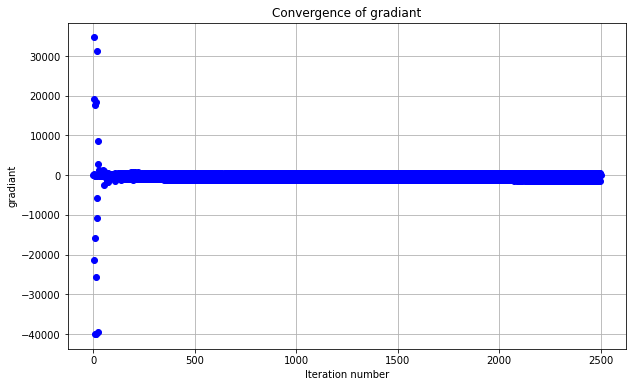

305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 514.5445544554456, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.6204620462047, 76.37425742574258, 1.0, 382.9207920792079, 419.3003300330033, -1305.

In [146]:
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot( range(len(jvec)) ,jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of gradiant")
    plt.xlabel("Iteration number")
    plt.ylabel("gradiant")
    #dummy = plt.xlim([-0.05*iterations,1.05*iterations])

plotConvergence(jvec)
plt.show()